Sheyi Faparusi - cgz6qa

# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

**Answer:** I would define the most profitable item as the whatever has the best ratio of lowest cost for the state to highest cost for retail. (State Bottle Retail - State Bottle Cost) x Bottles Sold. That means they're making the most money from selling the liquor and getting a good return on their investment

So the most profitable item is: Titos Handmade Vodka

In [8]:
import numpy as np 
import pandas as pd

df = pd.read_csv('data/iowa.csv')
df["Category Name"].value_counts()


Category Name
AMERICAN VODKAS              16611
CANADIAN WHISKIES            15280
STRAIGHT BOURBON WHISKIES    10416
WHISKEY LIQUEUR               7789
SPICED RUM                    7379
                             ...  
ROCK & RYE                      14
LOW PROOF VODKA                 11
ANISETTE                         7
WHITE CREME DE MENTHE            6
AMARETTO - IMPORTED              2
Name: count, Length: 92, dtype: int64

In [3]:
#make a column for profit 
df['profit'] = df['Sale (Dollars)'] - df['State Bottle Cost']*df['Bottles Sold']
df['profit']

#group by item description and add up profits
group_df = df.groupby('Item Description')['profit'].sum()

#sort in descending order 
df_sorted = group_df.sort_values(ascending=False)
df_sorted.head() , df_sorted.tail()

(Item Description
 TITOS HANDMADE VODKA         361583.84
 BLACK VELVET                 274024.45
 FIREBALL CINNAMON WHISKEY    187554.54
 CROWN ROYAL                  160402.53
 CROWN ROYAL REGAL APPLE      122614.70
 Name: profit, dtype: float64,
 Item Description
 SIEMPRE ANEJO                   0.00
 99 MANGOES MINI               -16.20
 OLD ELK 10YR WHEAT WHISKEY    -32.50
 COLD SPELL MINT MINI DISCO   -118.58
 99 SOUR CHERRY MINI          -358.22
 Name: profit, dtype: float64)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gumdr\AppData\Local\Temp\ipykernel_19296\2519683559.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profits.values, y=top_profits.index, palette="viridis", orient='h')


<Axes: ylabel='Item Description'>

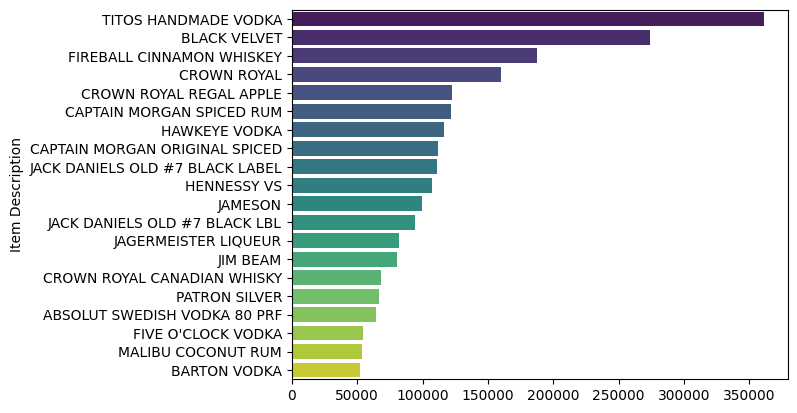

In [4]:
top_profits = df_sorted[:20]

sns.barplot(x=top_profits.values, y=top_profits.index, palette="viridis", orient='h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [42]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [79]:
x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [74]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [93]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [43]:
#implementation of x.reshape(-1,1)-y.reshape(1,-1)
arr = np.array([0,0])

for i in x:
    temp = []
    for j in y:
        temp.append(int(i-j))
    #add temp to arr
    arr = np.vstack((arr, temp))
#delete first row
arr = np.delete(arr, 0, axis=0)
arr      

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [7]:
#implementation of x.reshape(1,-1)-y.reshape(-1,1)
arr = np.array([0,0,0])

for i in y:
    temp = []
    for j in x:
        temp.append(int(j-i))
    arr = np.vstack((arr, temp))

arr = np.delete(arr, 0, axis=0)

arr      

array([[-1,  1,  3],
       [-4, -2,  0]])

**Answer:** When you try to subtract them you get an error that says they cant be broadcast together because they're different sizes/shapes

-The first reshape gives you an array of numbers  with 3 rows and 2 columns 

-`x.reshape(1,-1)` returns an x array with 1 row and as many columns as necessary 

-The second reshape gives you  an array of numbers with 2 rows and 3 columns and is the transpose of the first reshape -

-`x.reshape(-1,1)` returns an x array with 1 column and as many rows as necessary 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

**Answer:** 

-Explain 

-as the sample size N increases, ECDF curve visually gets much smoother 

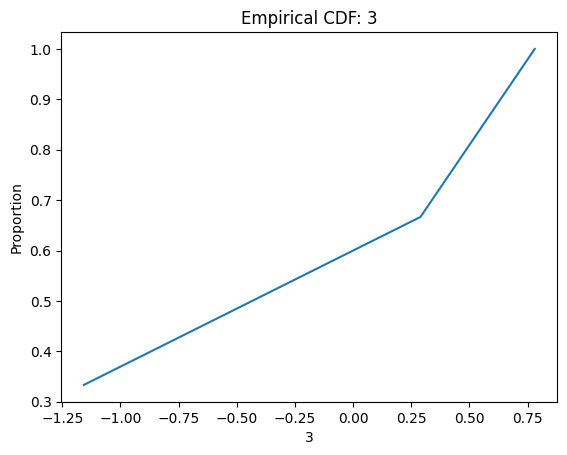

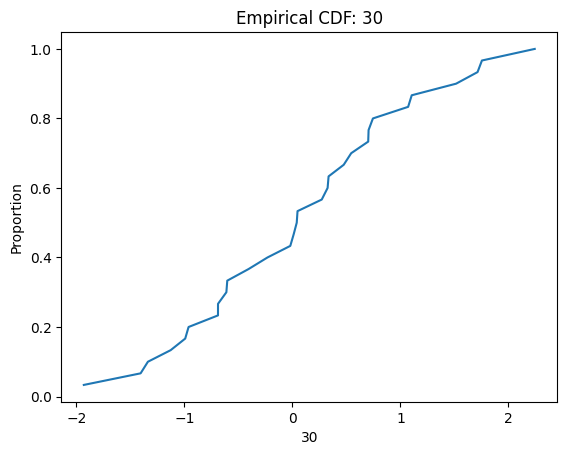

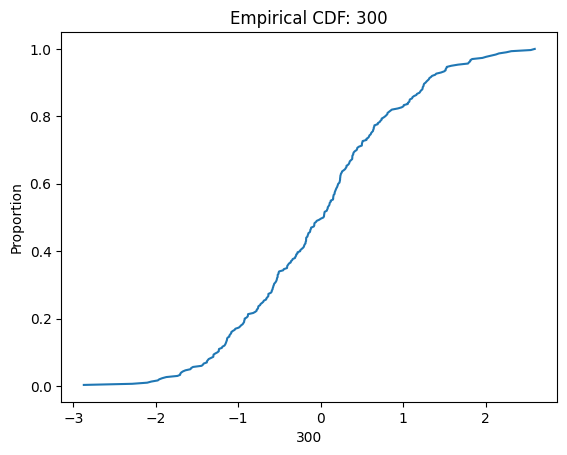

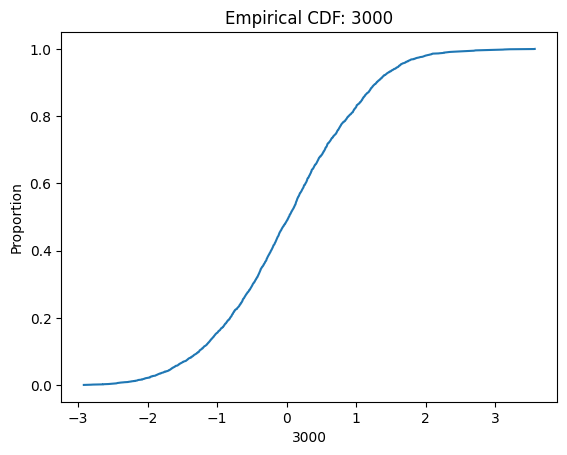

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    
    Z = np.sort(np.unique(X)) # Extract and sort unique values for 
    compare = np.array(X).reshape(-1,1) <= np.array(Z).reshape(1,-1)
    #compare = X.to_numpy().reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z
    
    title_str = N
    
    plt.plot(Z,ecdf)
    plt.title(f'Empirical CDF: {title_str}')
    plt.ylabel('Proportion')
    plt.xlabel(title_str)
    plt.show()




4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [120]:
#load df
df = pd.read_csv('data/metabric.csv')
f_hat ,Z = ecdf(df['Age at Diagnosis'])

In [119]:
def ecdf(x):
    # Compute ecdf function:
    Z = np.sort(x.unique()) # Extract and sort unique values for x
    compare = x.to_numpy().reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    
    ecdf = np.mean(compare,axis=0) # Average over x indices for each z
    return ecdf, Z

In [118]:
# find any quantile
# q is quantile
def compute_quantile(F_hat, grid, q):
    # Find median index closest to input q
    idx = np.searchsorted(F_hat, q)
    if idx == 0:
        return grid[0]
    elif idx == len(F_hat):
        return grid[-1]
    # Points just below and above the quantile threshold:
    x0, x1 = grid[idx - 1], grid[idx]
    y0, y1 = F_hat[idx - 1], F_hat[idx]
    # Linear interpolation for quantile :
    t = (q - y0) / (y1 - y0)
    return x0 + t * (x1 - x0)

#compare quantile functions 
compute_quantile(f_hat, Z, 0.6), np.quantile(df['Age at Diagnosis'], 0.6)


(np.float64(64.634), np.float64(64.648))

In [117]:
#parameter is column of data frame
#returns left whisker, right whisker, and IQR
def IQR(dfC):
    Q1 = compute_quantile(ecdf(dfC)[0],ecdf(dfC)[1], 0.25)
    Q3 = compute_quantile(ecdf(dfC)[0],ecdf(dfC)[1], 0.75)
    iqr= Q3 - Q1

    left_whisker= Q1 - 1.5 * iqr
    right_whisker = Q3 + 1.5 * iqr
    return left_whisker, right_whisker, iqr
    

IQR(df['Age at Diagnosis'])

(np.float64(22.804375),
 np.float64(98.00937499999998),
 np.float64(18.801249999999996))

In [116]:
def summary(dfC):
    #min 
    min = dfC.min()
    #max
    max = dfC.max()
    #quartiles
    Q1 = compute_quantile(ecdf(dfC)[0],ecdf(dfC)[1], 0.25)
    Q3 = compute_quantile(ecdf(dfC)[0],ecdf(dfC)[1], 0.75)
    #median 
    med = compute_quantile(ecdf(dfC)[0],ecdf(dfC)[1], 0.5)
    #whiskers
    left_whisk, right_whisk, x= IQR(dfC)
    #return min, max, Q1, Q3, med, left_whisk, right_whisk
    print("left whisker:", left_whisk)
    print("min: ", min )
    print("First quantile:",Q1)
    print("median:", med)
    print("Third quantile:",Q3)
    print("max:", max)
    print("right whisker:", right_whisk)

In [113]:
def outliers(dfC):
    left_whisk, right_whisk, b= IQR(dfC)
    outL = np.array([])
    for x in dfC:
        if x<left_whisk or x>right_whisk:
            outL = np.append(outL,True)
        else:
            outL = np.append(outL,False)
    return outL
        
outliers(df['Age at Diagnosis'])

array([0., 0., 0., ..., 0., 0., 0.], shape=(1343,))

<Axes: xlabel='Age at Diagnosis'>

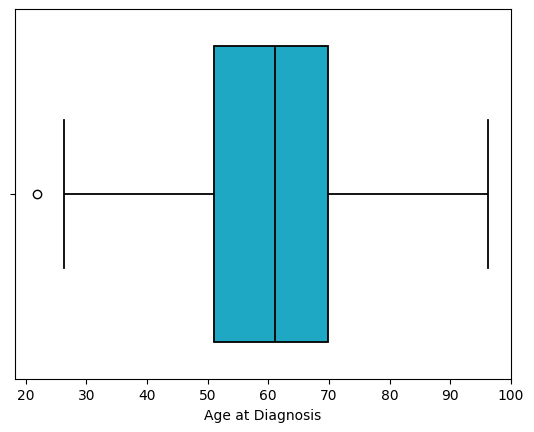

In [114]:
sns.boxplot(df['Age at Diagnosis'],orient='h', color= '#04BADE', linewidth=1.3,linecolor='black')

In [115]:
#my summary
summary(df['Age at Diagnosis']), df['Age at Diagnosis'].describe()

left whisker: 22.804375
min:  21.93
First quantile: 51.006249999999994
median: 61.129999999999995
Third quantile: 69.80749999999999
max: 96.29
right whisker: 98.00937499999998


(None,
 count    1343.000000
 mean       60.598079
 std        12.966330
 min        21.930000
 25%        51.045000
 50%        61.140000
 75%        69.815000
 max        96.290000
 Name: Age at Diagnosis, dtype: float64)

In [107]:
out  = outliers(df['Age at Diagnosis'])
unique_vals, counts = np.unique(out, return_counts=True)
unique_vals, counts

(array([0., 1.]), array([1342,    1]))

**Answer:** when I compare the differences between my output and the output for `sns.boxplot` /`df.describe()`, the min and max are the same but the median, Q1, and Q3 all have slight differences in their decimal places, with my results being slightly smaller than the df describe output. There are the same amount of outliers in both. The whiskers look about the same but the left whisker in the boxplot may be a little bigger than the whisker got, which would make sense since the Q1 the boxplot has is slightly bigger than mine. 

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?